# KNN

KNN is a simple algorithm that looks at the distance between a point and its <b>nearest neighbor</b>! 

The most commonly used distance is the euclidean distance.
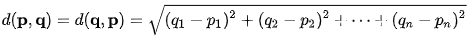

In [1]:
def euclid_dist(point1, point2):
    distance = 0
    for a, b in zip(point1,point2):
        distance += (a-b)**2
    return distance**.5


A better approach is to calculate `linalg.norm` by looking at one point to the entire dataset.

In [2]:
def all_distances(point, data_set):
    diff = point - data_set
    result = np.apply_along_axis(np.linalg.norm, 1, diff )
    all_distances = np.sort(result)
    return all_distances


For each point, it gets a voting, could be a majority voting or a weighted voting.
Ties are infrequent.

In [3]:
from collections import Counter

def label_voting(labels):
    labels = list(labels)
    c = Counter(labels).most_common()
    if len(c) == 1:
        return c[0][0]
    if c[0][1] > c[1][1]:
        return c[0][0]
    
    top_votes = c[0][1]
    votes_pos = []
    for t in c:
        if t[1] == top_votes:
            votes_pos.append(t[0])
    idx = dict()
    
    for p in votes_pos:
        idx[labels.index(p)] = p
        
    return labels[sorted(idx.keys())[0]]


In [4]:
def KNN(point, X, y, n):

    diff = point - X

    dists = np.apply_along_axis(np.linalg.norm, 1, diff )

    df = pd.DataFrame(dists)
    df.index = X_train.index

    df = pd.concat([df, y_train], axis = 1)

    votes = list(df.sort_values("dist").head(n)['label'])
    return label_voting(votes)
